# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
#Importações das Bibliotecas.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
#Lendo o CSV e Amostragem de dados.
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
#Utilizando Groupby para verificar a Idade da Mãe e do Pai por Município.
sinasc_raw.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [4]:
#Separando somente a data do meu aniversário (31/07) e o sexo e o peso dos bebês que nasceram nesta data.
niver = sinasc_raw[sinasc_raw['DTNASC'] == '2019-07-31'].groupby(['DTNASC','SEXO'])[['PESO']]
print(f"Meu aniversário é no dia 31/07, foram {niver.count().sum().sum()} bebês nascidos nesta data em 2019.")

niver.agg([('Quantidade','count'), ('Média','mean')]).round(2)

Meu aniversário é no dia 31/07, foram 69 bebês nascidos nesta data em 2019.


PESO         
                     Quantidade    Média
DTNASC     SEXO                         
2019-07-31 Feminino          27  3254.74
           Masculino         42  3239.86

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [5]:
#3. Qual o municipio que nasceu menos bebe em 2019?
#Os 6 municípios que menos nasceram bebês em 2019.
sinasc_raw.groupby('munResNome')['DTNASC'].count().sort_values(ascending=True)[0:6].to_frame()

,DTNASC
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50


In [6]:
# - qual a idade media, maxima, minima das maes nesse municipio?

sinasc_raw.groupby('munResNome').aggregate({
    'DTNASC': [('Contagem', 'count')],
    'IDADEMAE': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')]
}).sort_values(by=('DTNASC','Contagem'), ascending=True)[:6]

DTNASC   IDADEMAE              
                        Contagem      Média Máxima Mínima
munResNome                                               
Município ignorado - RO        1  24.000000     24     24
Castanheiras                  32  27.281250     39     17
Pimenteiras do Oeste          40  25.075000     40     14
Primavera de Rondônia         43  27.023256     39     16
Parecis                       44  26.454545     41     16
Rio Crespo                    50  26.660000     39     16

In [7]:
# - qual a idade media, maxima, minima dos pais nesse municipio?

sinasc_raw.groupby('munResNome').aggregate({
    'DTNASC': [('Contagem', 'count')],
    'IDADEPAI': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')]
}).sort_values(by=('DTNASC','Contagem'), ascending=True)[:6]

DTNASC   IDADEPAI              
                        Contagem      Média Máxima Mínima
munResNome                                               
Município ignorado - RO        1  22.000000   22.0   22.0
Castanheiras                  32  30.392857   43.0   17.0
Pimenteiras do Oeste          40  35.600000   45.0   25.0
Primavera de Rondônia         43  31.888889   44.0   21.0
Parecis                       44  32.473684   61.0   18.0
Rio Crespo                    50  28.000000   28.0   28.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [8]:
# 4. Qual o municipio que nasceu mais bebe no mês de março?
#Os 5 municípios que mais nasceram bebês em 2019.
mes3 = sinasc_raw[(sinasc_raw['DTNASC'] >= '2019-03-01') & (sinasc_raw['DTNASC'] <= '2019-03-31')].fillna(0)

mes3.groupby('munResNome')[['IDADEMAE']].count().sort_values('IDADEMAE', ascending=False)[:5]

,IDADEMAE
munResNome,
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133


In [9]:
# - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

mes3.groupby('munResNome').aggregate({
    'IDADEMAE': [('Contagem', 'count')],
    'QTDFILVIVO': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')]
}).sort_values(by=('IDADEMAE','Contagem'), ascending=False)[0:1]

IDADEMAE QTDFILVIVO              
            Contagem      Média Máxima Mínima
munResNome                                   
Porto Velho      744   1.091398    9.0    0.0

In [10]:
# - qual a idade media, maxima, minima dos pais nesse municipio?

mes3.groupby('munResNome').agg({
    'IDADEMAE': [('Contagem', 'count'), ('Média','mean'), ('Máxima','max'), ('Mínima', 'min')],
    'IDADEPAI': [('Média','mean'), ('Máxima','max'), ('Mínima', 'min')]
}).sort_values(by=('IDADEMAE','Contagem'), ascending=False)[0:1]

IDADEMAE                           IDADEPAI              
            Contagem      Média Máxima Mínima     Média Máxima Mínima
munResNome                                                           
Porto Velho      744  26.596774     44     14  2.885753   62.0    0.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [11]:
#EXTRA
#Separei os dados mais relevantes entre 'Object' e 'numeric'.
sinasc_obj = pd.DataFrame(sinasc_raw[['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'SEXO', 'RACACOR', 'DTNASC']])
sinasc_num = pd.DataFrame(sinasc_raw[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CONSULTAS', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'IDADEPAI']])

In [12]:
#Junção dos dados para analise.
sinasc = pd.concat([sinasc_num,sinasc_obj], axis=1)

                       APGAR1    APGAR5
GESTACAO                               
37 a 41 semanas      8.191114  9.224437
42 semanas e mais    8.120516  9.219198
32 a 36 semanas      7.820949  8.908684
28 a 31 semanas      6.604938  7.987654
22 a 27 semanas      5.369048  6.623529
Menos de 22 semanas  5.857143  6.571429


<Axes: xlabel='GESTACAO'>

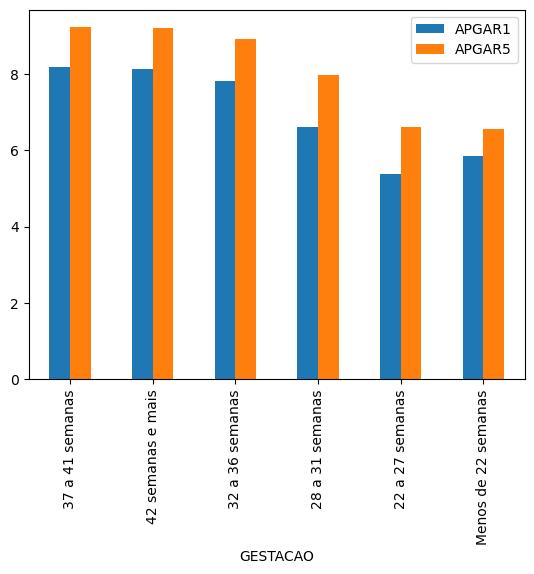

In [13]:
#Observa-se que quanto menos Semanas, menor será o APGAR.

print(f"{sinasc.groupby(['GESTACAO'])[['APGAR1','APGAR5']].mean().sort_values('APGAR5', ascending=False)}")

sinasc.groupby(['GESTACAO'])[['APGAR1','APGAR5']].mean().sort_values('APGAR5', ascending=False).plot.bar()

<Axes: title={'center': 'Comparação Idade da Mãe x Quantidade de Filhos(média)'}, xlabel='Idade da Mãe', ylabel='Quantidade de Filhos'>

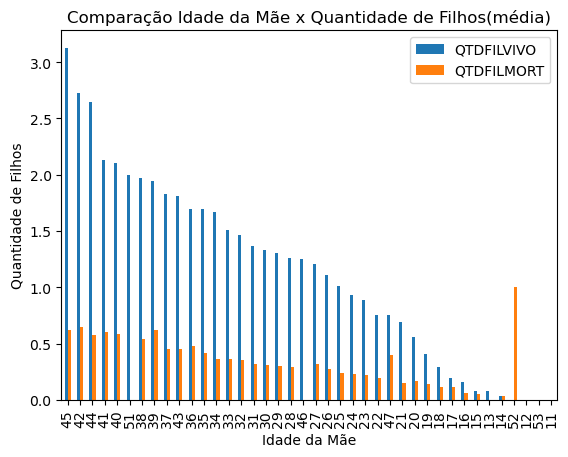

In [14]:
#Observa-se que em média Mulheres entre 40-45 anos, tem um número maior de filhos.
sinasc.groupby('IDADEMAE')[['QTDFILVIVO', 'QTDFILMORT']].mean().sort_values('QTDFILVIVO', ascending=False).plot.bar(xlabel='Idade da Mãe',
                                                                         ylabel='Quantidade de Filhos',
                                                                         title='Comparação Idade da Mãe x Quantidade de Filhos(média)')

<Axes: >

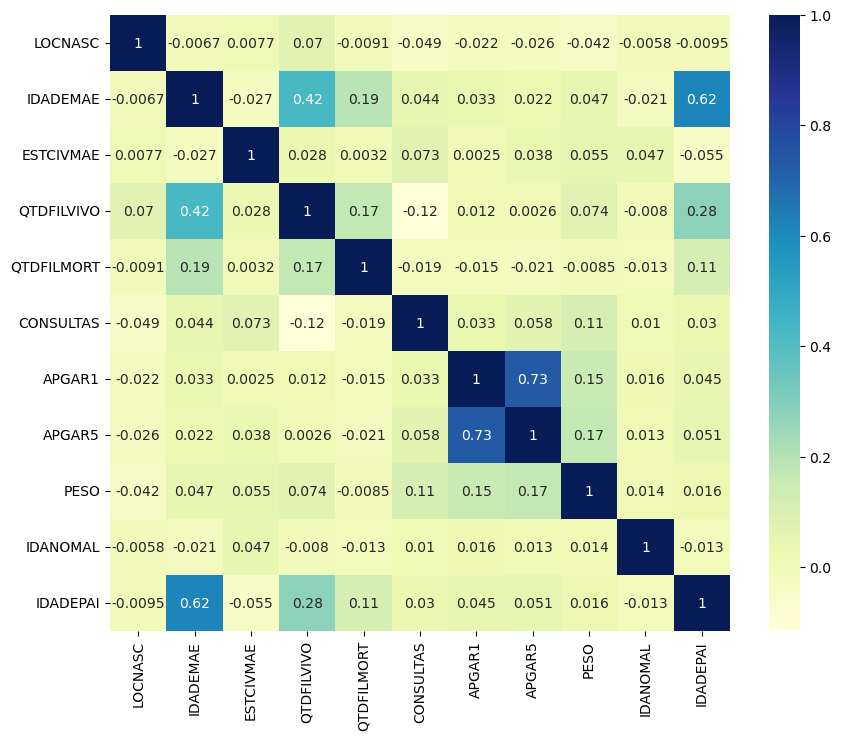

In [15]:
#Heatmap do dados numéricos.
plt.figure(figsize=(10,8))
sns.heatmap(sinasc_num.corr(numeric_only=True), annot=True, cmap="YlGnBu")